In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('/content/fraudTrain.csv')
test_data = pd.read_csv('/content/fraudTest.csv')

In [3]:
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38928,38928,2019-01-23 14:37:31,4301028321766222513,fraud_Lynch-Wisozk,home,74.81,Joe,Howard,M,109 Brian Lights Apt. 504,...,40.6025,-80.3863,198.0,Secretary/administrator,1978-10-26,4a3f2cb46e9ef3b082e6c13c03793538,1.327329e+09,40.520489,-80.284361,0.0
38929,38929,2019-01-23 14:37:31,30082025922891,fraud_Berge-Hills,kids_pets,114.94,Kathleen,Thompson,F,199 Patterson Fords Apt. 132,...,26.1184,-81.7361,276002.0,"Pilot, airline",1934-06-23,db17bd9a03382b63f2ea058a52754036,1.327329e+09,25.515324,-81.857553,0.0
38930,38930,2019-01-23 14:38:35,213157767990030,"fraud_Kuhic, Bins and Pfeffer",shopping_net,90.35,Tara,Campbell,F,05050 Rogers Well Apt. 439,...,41.6060,-109.2300,27971.0,Music therapist,1984-08-01,6469a8da0db6157e7bac720710b809f4,1.327330e+09,41.963373,-108.558776,0.0
38931,38931,2019-01-23 14:38:49,502012776709,fraud_Schulist Ltd,food_dining,74.99,Sherry,Martinez,F,144 Yu Locks Apt. 754,...,42.6315,-75.1866,165.0,Naval architect,1945-09-20,25817b69ad879c7938428d1efd6e2a4e,1.327330e+09,41.645807,-74.274040,0.0


In [8]:
print(train_data.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [7]:
column_names = train_data.columns
print("Column Names:", column_names)

Column Names: Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [10]:
print("Dataset Information:")
print(train_data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38933 entries, 0 to 38932
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             38933 non-null  int64  
 1   trans_date_trans_time  38933 non-null  object 
 2   cc_num                 38933 non-null  int64  
 3   merchant               38932 non-null  object 
 4   category               38932 non-null  object 
 5   amt                    38932 non-null  float64
 6   first                  38932 non-null  object 
 7   last                   38932 non-null  object 
 8   gender                 38932 non-null  object 
 9   street                 38932 non-null  object 
 10  city                   38932 non-null  object 
 11  state                  38932 non-null  object 
 12  zip                    38932 non-null  float64
 13  lat                    38932 non-null  float64
 14  long                   38932 non-

In [12]:
print("\nSummary Statistics:")
print(train_data.describe())


Summary Statistics:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  38933.000000  3.893300e+04  38932.000000  38932.000000  38932.000000   
mean   19466.000000  4.140962e+17     72.120214  48694.978629     38.542191   
std    11239.133352  1.305233e+18    153.935530  27003.486815      5.092785   
min        0.000000  4.716562e+08      1.000000   1257.000000     20.027100   
25%     9733.000000  1.800462e+14      9.700000  25526.000000     34.690200   
50%    19466.000000  3.518759e+15     47.970000  48088.000000     39.346500   
75%    29199.000000  4.635331e+15     83.710000  72011.000000     41.846700   
max    38932.000000  4.992346e+18  11872.210000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  38932.000000  3.893200e+04  3.893200e+04  38932.000000  38932.000000   
mean     -90.236719  8.934377e+04  1.326370e+09     38.542701    -90.240719   
std       13.953966  2.987870e

In [14]:
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


In [16]:
print("\nClass Distribution:")
print(train_data['is_fraud'].value_counts())


Class Distribution:
0.0    38545
1.0      387
Name: is_fraud, dtype: int64


In [18]:
from sklearn.preprocessing import MinMaxScaler
small_value = 0.001

In [19]:
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].mean())

In [20]:
categorical_columns = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
train_data[categorical_columns] = train_data[categorical_columns].fillna(train_data[categorical_columns].mode().iloc[0])

In [21]:
train_data = train_data.replace(to_replace=float('nan'), value=small_value)

In [22]:
scaler = MinMaxScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

In [28]:
print(train_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [27]:
columns_to_fill = ['trans_date_trans_time', 'cc_num', 'gender', 'trans_num']
train_data[columns_to_fill] = train_data[columns_to_fill].fillna(small_value)
train_data['gender'] = train_data['gender'].map({'F': 0, 'M': 1})

In [30]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['day_of_week'] = train_data['trans_date_trans_time'].dt.dayofweek
train_data['transaction_hour'] = train_data['trans_date_trans_time'].dt.hour

In [31]:
train_data['age'] = (pd.to_datetime('now') - pd.to_datetime(train_data['dob'])).astype('<m8[Y]')

<ipython-input-31-f380088d2811>:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  train_data['age'] = (pd.to_datetime('now') - pd.to_datetime(train_data['dob'])).astype('<m8[Y]')


In [55]:
numeric_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
categorical_features = ['category', 'gender', 'state']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [82]:
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,day_of_week,transaction_hour,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,0.000334,Jennifer,Banks,0,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,0.000000,0.356394,0.848683,0.000,1,0,35.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.008949,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,0.000013,0.632496,0.486076,0.000,1,0,45.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,0.018457,Edward,Sanchez,1,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,0.000017,0.506321,0.546601,0.000,1,0,62.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,0.003706,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,0.000030,0.587877,0.542521,0.000,1,0,57.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,0.003450,Tyler,Garcia,1,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,0.000086,0.412332,0.882957,0.000,1,0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38928,38928,2019-01-23 14:37:31,4301028321766222513,fraud_Lynch-Wisozk,home,0.006218,Joe,Howard,1,109 Brian Lights Apt. 504,...,Secretary/administrator,1978-10-26,4a3f2cb46e9ef3b082e6c13c03793538,0.999960,0.451087,0.866382,0.000,2,14,45.0
38929,38929,2019-01-23 14:37:31,30082025922891,fraud_Berge-Hills,kids_pets,0.009598,Kathleen,Thompson,0,199 Patterson Fords Apt. 132,...,"Pilot, airline",1934-06-23,db17bd9a03382b63f2ea058a52754036,0.999960,0.135979,0.850597,0.000,2,14,89.0
38930,38930,2019-01-23 14:38:35,213157767990030,"fraud_Kuhic, Bins and Pfeffer",shopping_net,0.007527,Tara,Campbell,0,05050 Rogers Well Apt. 439,...,Music therapist,1984-08-01,6469a8da0db6157e7bac720710b809f4,0.999993,0.481387,0.582680,0.000,2,14,39.0
38931,38931,2019-01-23 14:38:49,502012776709,fraud_Schulist Ltd,food_dining,0.006233,Sherry,Martinez,0,144 Yu Locks Apt. 754,...,Naval architect,1945-09-20,25817b69ad879c7938428d1efd6e2a4e,1.000000,0.474718,0.926689,0.000,2,14,78.0


In [57]:
X = train_data.drop(['is_fraud', 'trans_date_trans_time', 'dob', 'first', 'last', 'street', 'city'], axis=1)
y = train_data['is_fraud']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [60]:
y_train_binary = (y_train > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)
pipeline.fit(X_train, y_train_binary)
y_pred = pipeline.predict(X_test)

In [44]:
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.9964042635161166

Confusion Matrix:
 [[7716    4]
 [  24   43]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7720
         1.0       0.91      0.64      0.75        67

    accuracy                           1.00      7787
   macro avg       0.96      0.82      0.88      7787
weighted avg       1.00      1.00      1.00      7787



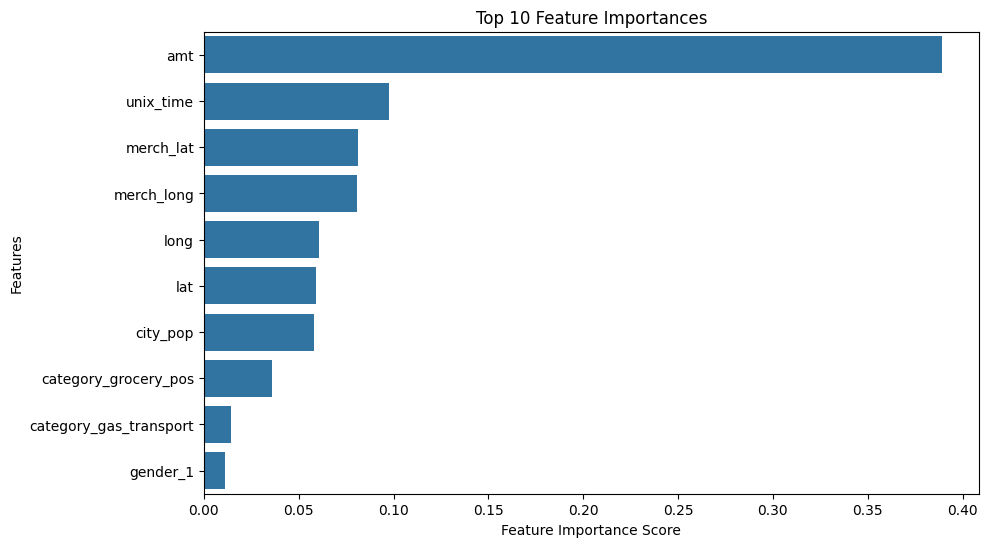

In [61]:
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importances = pd.Series(pipeline.named_steps['classifier'].feature_importances_, index=feature_names)
top_features = feature_importances.nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [49]:
from datetime import datetime, timedelta
import numpy as np

In [73]:
num_samples = 10
dummy_data = {
    'trans_date_trans_time': pd.date_range(datetime.now(), periods=num_samples, freq='H'),
    'cc_num': np.random.randint(1000000000000000, 9999999999999999, size=num_samples),
    'merchant': [f'Merchant_{i}' for i in range(num_samples)],
    'category': ['grocery_pos', 'entertainment', 'gas_transport', 'misc_pos', 'grocery_pos',
                 'entertainment', 'gas_transport', 'misc_pos', 'grocery_pos', 'entertainment'],
    'amt': np.random.uniform(1, 500, size=num_samples),
    'gender': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'is_fraud': [0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
}
dummy_df = pd.DataFrame(dummy_data)

In [77]:
numeric_features = ['amt']
categorical_features = ['category', 'gender']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
y_train_binary = (y_train > 0.5).astype(int)
pipeline.fit(X_train, y_train_binary)
dummy_predictions = pipeline.predict(dummy_df[numeric_features + categorical_features])
dummy_df['is_fraud_prediction'] = dummy_predictions
print(dummy_df[['trans_date_trans_time', 'amt', 'is_fraud', 'is_fraud_prediction']])


       trans_date_trans_time         amt  is_fraud  is_fraud_prediction
0 2024-02-09 15:34:44.747396  448.646132         0                    1
1 2024-02-09 16:34:44.747396  117.580382         1                    0
2 2024-02-09 17:34:44.747396   66.142571         0                    0
3 2024-02-09 18:34:44.747396  115.709280         0                    0
4 2024-02-09 19:34:44.747396  399.225110         1                    1
5 2024-02-09 20:34:44.747396  189.842445         0                    0
6 2024-02-09 21:34:44.747396   73.392370         0                    0
7 2024-02-09 22:34:44.747396  483.724313         0                    0
8 2024-02-09 23:34:44.747396  236.479896         1                    1
9 2024-02-10 00:34:44.747396  131.782562         0                    0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [78]:
actual_labels = dummy_df['is_fraud']
predicted_labels = dummy_df['is_fraud_prediction']

In [79]:
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

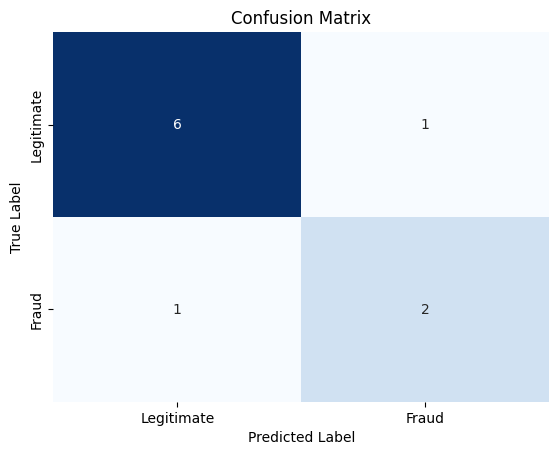

In [80]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()